([<matplotlib.axis.XTick at 0x224fc6b0b90>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

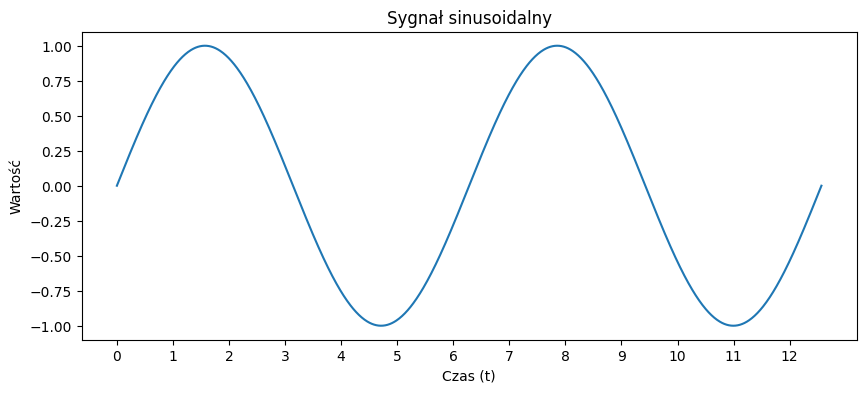

In [188]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

np.random.seed(42)

N = int(4 * np.pi * 100)
t = np.linspace(0, 4 * np.pi, N)

sine = np.sin(t)

plt.figure(figsize=(10, 4))
plt.plot(t, sine)
plt.title('Sygnał sinusoidalny')
plt.ylabel('Wartość')
plt.xlabel('Czas (t)')
plt.xticks(np.arange(0, ceil(4*np.pi), step=1))

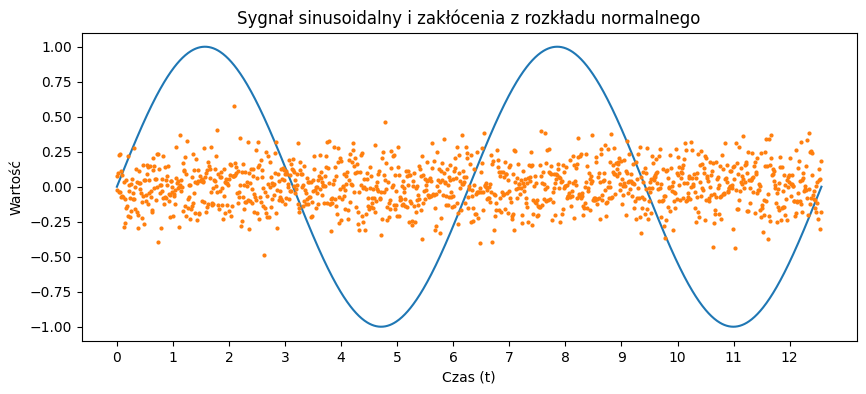

In [189]:
noise = np.random.normal(0, .15, N)

plt.figure(figsize=(10,4))
plt.plot(t, sine)
plt.plot(t, noise, 'o', markersize=2)
plt.title('Sygnał sinusoidalny i zakłócenia z rozkładu normalnego')
plt.ylabel('Wartość')
plt.xlabel('Czas (t)')
plt.xticks(np.arange(0, ceil(4*np.pi), step=1))
plt.show()

Text(0.5, 0, 'Czas (t)')

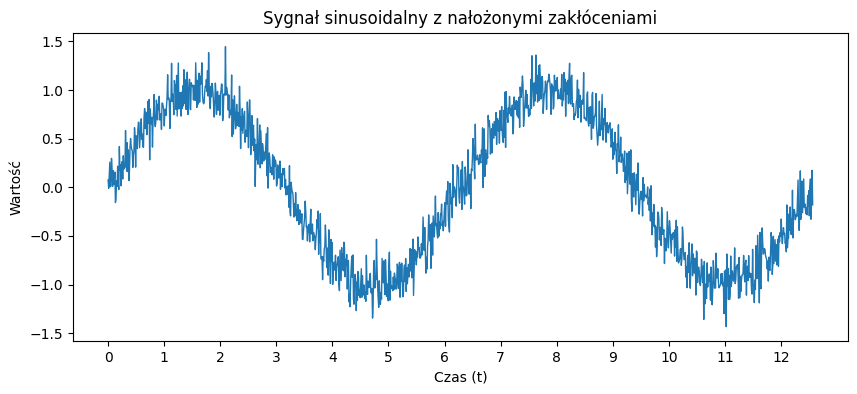

In [190]:
sine_noisy = sine + noise

plt.figure(figsize=(10,4))
plt.plot(t, sine_noisy, linewidth=1)
plt.title('Sygnał sinusoidalny z nałożonymi zakłóceniami')
plt.ylabel('Wartość')
plt.xticks(np.arange(0, ceil(4*np.pi), step=1))
plt.xlabel('Czas (t)')

In [191]:
def delta_h_estimator(noisy_singal, clean_signal, H):
    x_hat = np.zeros(N)
    counts = np.zeros(N)
    deltas = []

    for start in range(0, N - H + 1):
        end = start + H
        noisy_win = noisy_singal[start:end]
        clean_win = clean_signal[start:end]

        x_mean = noisy_win.mean()

        delta_win = np.mean((clean_win - x_mean)**2)
        deltas.append(delta_win)

        x_hat[start:end] += x_mean
        counts[start:end] += 1
    x_hat /= counts
    
    return np.mean(deltas), np.array(deltas), x_hat

([<matplotlib.axis.XTick at 0x224fdcece10>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

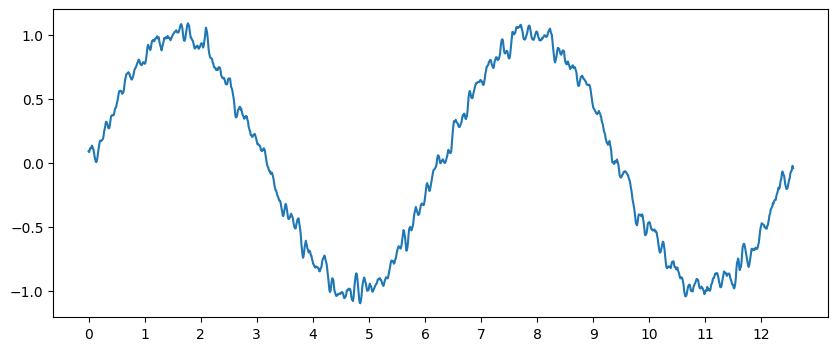

In [192]:
H = 5

avg_delta, deltas, x_hat = delta_h_estimator(sine_noisy, sine, H)

plt.figure(figsize=(10, 4))
plt.plot(t, x_hat)
plt.xticks(np.arange(0, ceil(4*np.pi), step=1))

([<matplotlib.axis.XTick at 0x224fc678b90>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

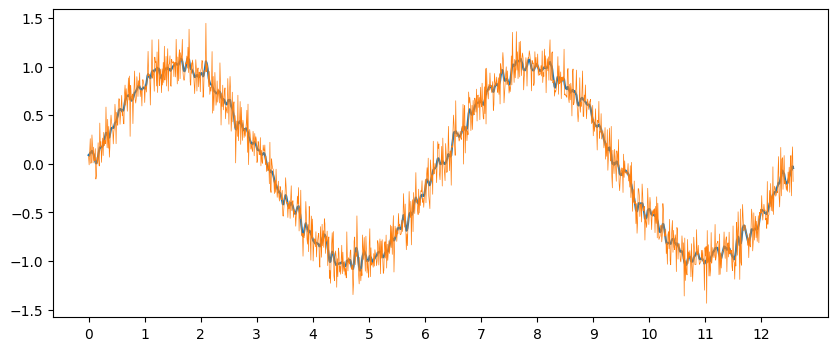

In [193]:
plt.figure(figsize=(10, 4))
plt.plot(t, x_hat)
plt.plot(t, sine_noisy, linewidth=.5)
plt.xticks(np.arange(0, ceil(4*np.pi), step=1))

In [194]:
print(avg_delta)
print(deltas)
print(x_hat)

0.004455374196398645
[0.0049408  0.00240227 0.00989243 ... 0.00384049 0.00073726 0.00073143]
[ 0.08887319  0.08291485  0.1014388  ... -0.05009949 -0.02496302
 -0.04306641]


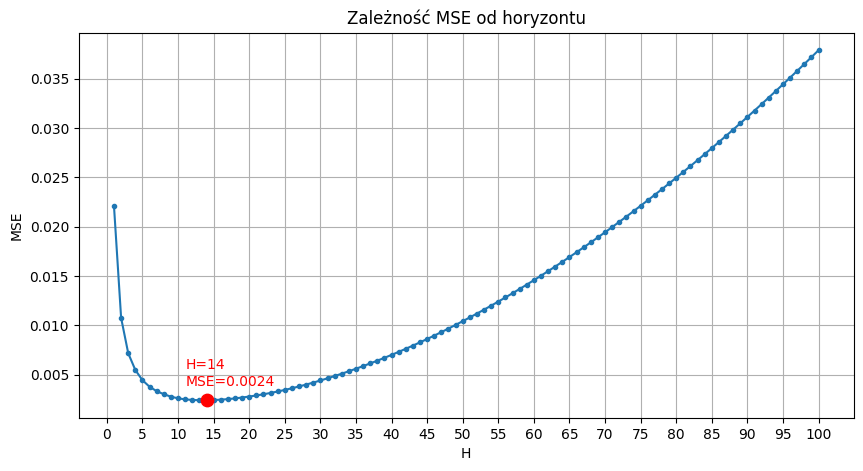

In [195]:
import numpy as np

Hs = np.arange(1, 101)
avg_deltas = [delta_h_estimator(sine_noisy, sine, H)[0] for H in Hs]

plt.figure(figsize=(10, 5))
plt.plot(Hs, avg_deltas, marker='.')
plt.xlabel('H')
plt.ylabel('MSE')
plt.xticks(np.arange(0, 101, step=5))
plt.title('Zależność MSE od horyzontu')
plt.grid(True)


min_idx = int(np.argmin(avg_deltas))
H_min = int(Hs[min_idx])
mse_min = avg_deltas[min_idx]

plt.scatter([H_min], [mse_min], color='red', s=80, zorder=5)
plt.annotate(f"H={H_min}\nMSE={mse_min:.4f}", xy=(H_min, mse_min),
             xytext=(H_min-3, mse_min+0.0015), color='red')

plt.show()